In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data

,disrict,client_id,client_catg,region,creation_date,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
0,60,train_Client_0,11,101,31/12/1994,0.0,35,352.400000,10.571429,0.000000,0.000000
1,69,train_Client_1,11,107,29/05/2002,0.0,37,557.540541,0.000000,0.000000,0.000000
2,62,train_Client_10,11,301,13/03/1986,0.0,18,798.611111,37.888889,0.000000,0.000000
3,69,train_Client_100,11,105,11/07/1996,0.0,20,1.200000,0.000000,0.000000,0.000000
4,62,train_Client_1000,11,303,14/10/2014,0.0,14,663.714286,104.857143,117.357143,36.714286
...,...,...,...,...,...,...,...,...,...,...,...
135488,62,train_Client_99995,11,304,26/07/2004,0.0,71,1.957746,0.000000,0.000000,0.000000
135489,63,train_Client_99996,11,311,25/10/2012,0.0,41,185.853659,0.756098,0.000000,0.000000
135490,63,train_Client_99997,11,311,22/11/2011,0.0,36,273.083333,0.000000,0.000000,0.000000
135491,60,train_Client_99998,11,101,22/12/1993,0.0,2,300.000000,70.500000,0.000000,0.000000


In [3]:
df = data.copy() # keep the original data

In [4]:
df.sample(5).T

,27742,63746,29830,71145,19872
disrict,69,69,69,60,62
client_id,train_Client_124965,train_Client_35425,train_Client_126844,train_Client_42084,train_Client_117882
client_catg,11,11,11,11,11
region,104,104,107,101,305
creation_date,24/02/2017,12/08/2016,12/06/2000,05/08/2015,29/10/2002
target,0.0,0.0,0.0,0.0,0.0
1transactions_count,7,7,66,2,67
consommation_level_1_mean,0.0,612.428571,341.772727,600.0,234.447761
consommation_level_2_mean,0.0,85.285714,12.121212,300.0,0.0
consommation_level_3_mean,0.0,0.0,6.015152,600.0,0.0


- Please refer to README.md for description of each parameter.


# Basic EDA

Check for missing values:

In [5]:
df.isnull().sum()

disrict                      0
client_id                    0
client_catg                  0
region                       0
creation_date                0
target                       0
1transactions_count          0
consommation_level_1_mean    0
consommation_level_2_mean    0
consommation_level_3_mean    0
consommation_level_4_mean    0
dtype: int64

Check the info about data:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_id                  135493 non-null  object 
 2   client_catg                135493 non-null  int64  
 3   region                     135493 non-null  int64  
 4   creation_date              135493 non-null  object 
 5   target                     135493 non-null  float64
 6   1transactions_count        135493 non-null  int64  
 7   consommation_level_1_mean  135493 non-null  float64
 8   consommation_level_2_mean  135493 non-null  float64
 9   consommation_level_3_mean  135493 non-null  float64
 10  consommation_level_4_mean  135493 non-null  float64
dtypes: float64(5), int64(4), object(2)
memory usage: 11.4+ MB


In [7]:
df.describe().loc[['min', 'mean', 'max', 'std']]

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean
min,60.000000,11.000000,101.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
mean,63.511222,11.512506,206.159809,0.055841,33.040445,432.366021,115.334253,27.634241,73.097981
max,69.000000,51.000000,399.000000,1.000000,439.000000,99920.000000,115683.000000,38526.857143,79179.777778
std,3.354400,4.423761,104.207044,0.229614,26.092229,758.003977,747.416809,157.294518,814.216626


# Checking Uniqueness

check the unique values of each columns

In [8]:
df.nunique()

disrict                           4
client_id                    135493
client_catg                       3
region                           25
creation_date                  8088
target                            2
1transactions_count             260
consommation_level_1_mean     94937
consommation_level_2_mean     51696
consommation_level_3_mean     26573
consommation_level_4_mean     16247
dtype: int64

There are columns that are that are categoricals, but are displayed as numerical. example include:
- district, 
- client_catg, 
- region.

These will be handled in the feature engineering part.

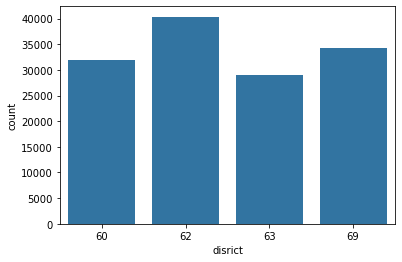

In [18]:
color = sns.color_palette()[0]
sns.countplot(data=df, x='disrict', color=color)
plt.show()

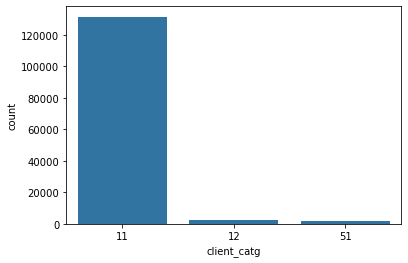

In [19]:
sns.countplot(data=df, x='client_catg', color=color)
plt.show()

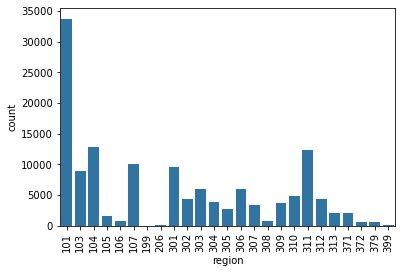

In [21]:
sns.countplot(data=df, x='region', color=color)
plt.xticks(rotation=90)
plt.show()

# Check Target Variables

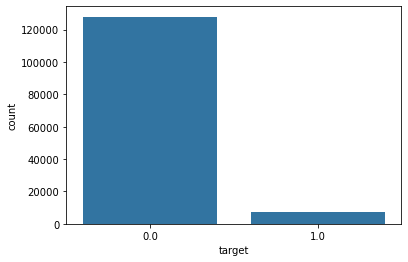

In [22]:
sns.countplot(data=df, x='target', color =color)
plt.show()

There is a huge class imbalance. This will be dealt with later in the analysis. There are more categories of non fraud compared to fraud.